In [1]:
import pandas as pd

In [2]:
file_path = './data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
print(chipo.shape)
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [4]:
# chipo라는 데이터 프레임에서 순서대로 10개의 데이터 나열
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [7]:
# order_id는 숫자열로서의 가치가 없기 때문에 문자열로 변환할 것임
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [9]:
chipo['order_id']= chipo['order_id'].astype('str')
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [10]:
chipo['order_id'] = chipo['order_id'].astype('str')
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [12]:
# 피처 내에 몇개의 범주가 있는지를 확인할 수 있다.
chipo['order_id'].unique()

array(['1', '2', '3', ..., '1832', '1833', '1834'], dtype=object)

In [13]:
len(chipo['order_id'].unique()) # order_id의 개수

1834

In [14]:
len(chipo['item_name'].unique())  # item_name의 개수

50

In [16]:
# 인덱스 슬라이싱
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [17]:
item_count = chipo['item_name'].value_counts()
print(item_count)

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [19]:
item_count = chipo['item_name'].value_counts()[:5]
print(item_count)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64


In [26]:
for i, enum in enumerate(item_count.iteritems()):
    print(i,enum)

0 ('Chicken Bowl', 726)
1 ('Chicken Burrito', 553)
2 ('Chips and Guacamole', 479)
3 ('Steak Burrito', 368)
4 ('Canned Soft Drink', 301)


In [31]:
# 뒤에 인덱스를 넣어서 시작점을 설정
for i, (val, cnt) in enumerate(item_count.iteritems(),1):          
    print('Top', i, ':', val,'(',cnt,')')

Top 1 : Chicken Bowl ( 726 )
Top 2 : Chicken Burrito ( 553 )
Top 3 : Chips and Guacamole ( 479 )
Top 4 : Steak Burrito ( 368 )
Top 5 : Canned Soft Drink ( 301 )


In [35]:
item_count = chipo['item_name'].value_counts()[:10]
for i, (val,cnt) in enumerate(item_count.iteritems(),1):
    print('Top', i, ':', val,'(',cnt,')')

Top 1 : Chicken Bowl ( 726 )
Top 2 : Chicken Burrito ( 553 )
Top 3 : Chips and Guacamole ( 479 )
Top 4 : Steak Burrito ( 368 )
Top 5 : Canned Soft Drink ( 301 )
Top 6 : Chips ( 211 )
Top 7 : Steak Bowl ( 211 )
Top 8 : Bottled Water ( 162 )
Top 9 : Chicken Soft Tacos ( 115 )
Top 10 : Chips and Fresh Tomato Salsa ( 110 )


In [34]:
chipo.groupby('item_name').count()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,54,54,54,54
Barbacoa Bowl,66,66,66,66
Barbacoa Burrito,91,91,91,91
Barbacoa Crispy Tacos,11,11,11,11
Barbacoa Salad Bowl,10,10,10,10
Barbacoa Soft Tacos,25,25,25,25
Bottled Water,162,162,0,162
Bowl,2,2,2,2
Burrito,6,6,6,6


In [38]:
#아이템별 주문 개수를 출력한다.
order_count = chipo.groupby('item_name')['order_id'].count()

In [39]:
# 10개로 슬라이싱
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [40]:
# 아이템별 주문 총량 구하기
chipo.groupby('item_name')['quantity'].count()

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [42]:
# 아이템별 주문 총량 계산하기
# 10개만 출력
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [46]:
item_quantity.index

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [48]:
item_quantity.index.tolist()

['6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda',
 'Canned Soft Drink',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Izze',
 'Nantucket Nectar',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Ta

In [51]:
item_name_list = item_quantity.index.tolist()
x = np.arange(len(item_name_list))
print(x)
order_cnt = item_quantity.values.tolist()
print(order_cnt)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[55, 66, 91, 12, 10, 25, 211, 4, 6, 126, 351, 71, 60, 8, 1, 6, 40, 761, 591, 50, 9, 123, 120, 230, 130, 506, 1, 23, 18, 45, 50, 33, 25, 2, 20, 29, 2, 110, 221, 386, 36, 4, 31, 56, 87, 97, 1, 6, 18, 8]


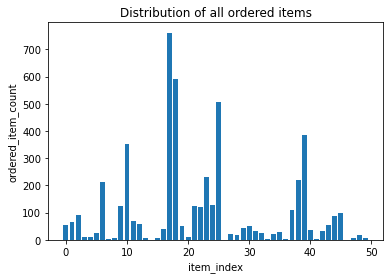

In [52]:
plt.bar(x,order_cnt, align = 'center')
plt.title('Distribution of all ordered items')
plt.ylabel('ordered_item_count')
plt.xlabel('item_index')
plt.show()